# CNN (Convolutional Neural Networks) 

This notebook covers:
 CNN Basics → Conv2D, MaxPooling, MNIST Datasets


All code is in TensorFlow + Keras, with explanations.


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Check TensorFlow version and GPU
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0
GPU Available: []


### Load MNIST dataset
- MNIST contains 28x28 grayscale images of handwritten digits (0-9)
- 60,000 images for training, 10,000 for testing


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Check original labels
print("Original y_train shape:", y_train.shape)  # Should be (60000,)
print("Original y_test shape:", y_test.shape)    # Should be (10000,)
print("Example labels:", y_train[:5])

Original y_train shape: (60000,)
Original y_test shape: (10000,)
Example labels: [5 0 4 1 9]


In [3]:
# Normalize pixel values to [0,1] and reshape to (28,28,1) for CNN
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels (0-9 digits)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# check the shape
print("After one-hot:", y_train.shape, y_test.shape)  # (60000, 10) (10000, 10)

After one-hot: (60000, 10) (10000, 10)


### Build a simple CNN model
- Conv2D: extracts features from images
- MaxPooling2D: reduces image size (downsampling)
- Flatten: converts 2D feature maps to 1D
- Dense: fully connected layer for classification


In [4]:
# Build simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
 ])
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Model Summary
model.summary()

D:\miniconda_setup\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model
- epochs: how many times the model sees the data
- batch_size: number of samples per gradient update


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9401 - loss: 0.2014 - val_accuracy: 0.9828 - val_loss: 0.0611
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9816 - loss: 0.0599 - val_accuracy: 0.9870 - val_loss: 0.0446
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9900 - val_loss: 0.0362
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9903 - val_loss: 0.0356
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9919 - loss: 0.0253 - val_accuracy: 0.9903 - val_loss: 0.0359


### Evaluate model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9879 - loss: 0.0337
Test Accuracy: 0.9879000186920166


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Predict on test set
y_pred_probs = model.predict(x_test)       # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to labels

# True labels
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


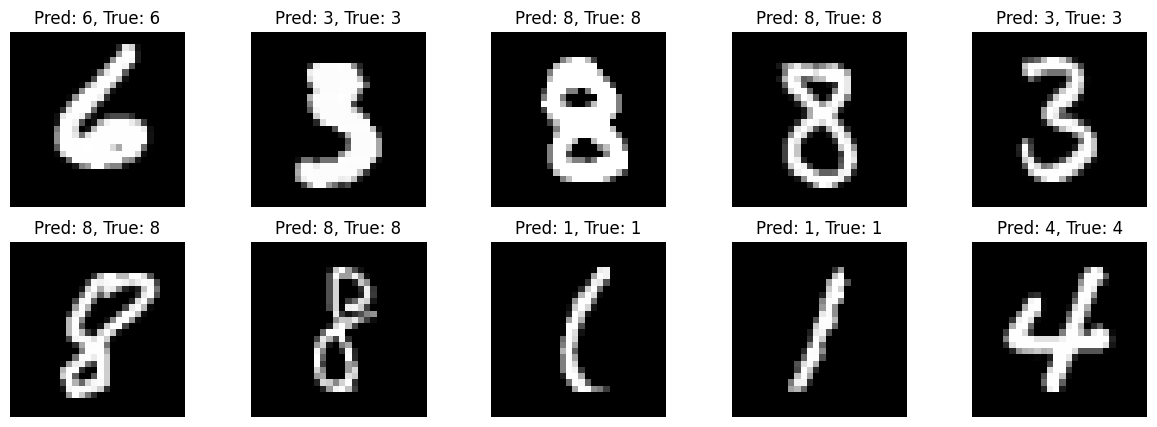

In [9]:
# Plot 10 random test images with predictions
num_images = 10
indices = np.random.choice(range(len(x_test)), num_images, replace=False)

plt.figure(figsize=(15,5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, True: {y_true[idx]}")
    plt.axis('off')
plt.show()


### CIFAR10 Dataset
- 60,000 32x32 color images, 10 classes
- More challenging than MNIST


### Build a deeper CNN model
- More Conv2D + MaxPooling layers
- Can improve accuracy on complex images


In [4]:
model_cifar = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_cifar.summary()


D:\miniconda_setup\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,786 (1.04 MB)

 Trainable params: 271,786 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the CIFAR10model
history_cifar = model_cifar.fit(x_train, y_train,
                                epochs=10,
                                batch_size=64,
                                validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.4443 - loss: 1.5320 - val_accuracy: 0.5608 - val_loss: 1.2254
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.6003 - loss: 1.1305 - val_accuracy: 0.6526 - val_loss: 1.0010
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 71s 101ms/step - accuracy: 0.6656 - loss: 0.9511 - val_accuracy: 0.6660 - val_loss: 0.9418
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.7090 - loss: 0.8336 - val_accuracy: 0.6974 - val_loss: 0.8764
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.7387 - loss: 0.7478 - val_accuracy: 0.7322 - val_loss: 0.7911
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 68s 96ms/step - accuracy: 0.7646 - loss: 0.6745 - val_accuracy: 0.7368 - val_loss: 0.7787
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - accuracy: 0.7857 - loss: 0.6104 - val_accuracy: 0.7498 - val_loss: 0.7361
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.8032 - loss: 0.5568